<a href="https://colab.research.google.com/github/cowsilver57/Project/blob/main/%EB%9E%9C%EB%94%A9%ED%81%B4%EB%9F%BD1_%EA%B0%9C%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/lending_club(original).csv')

# 1. 프로젝트 개요

##1-1. 추진 배경
* 대출 회사의 고객은 약 20%의 높은 체납률을 보이고 있음.

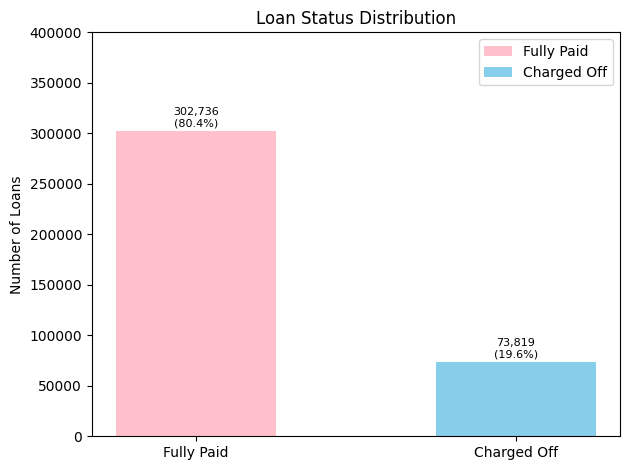

In [30]:
import matplotlib.pyplot as plt

fully_paid = len(data[data['loan_status'] == 'Fully Paid'])
charged_off = len(data[data['loan_status'] == 'Charged Off'])
total_loans = fully_paid + charged_off

fig, ax = plt.subplots()

bar_labels = ['Fully Paid', 'Charged Off']
bar_heights = [fully_paid, charged_off]
bar_colors = ['pink', 'skyblue']

bar_container = ax.bar(bar_labels, bar_heights, color=bar_colors, width=0.5, label=bar_labels)
ax.set_ylabel('Number of Loans')
ax.set_title('Loan Status Distribution')
ax.set_ylim(0, 400000)

# Function to add percentage labels
def add_percentage_labels():
    for i, bar in enumerate(bar_container):
        height = bar.get_height()
        ax.annotate('{:,.0f}\n({:.1%})'.format(height, height/total_loans),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=8)

add_percentage_labels()

ax.legend()
ax.margins(y=0.1)

plt.tight_layout()
plt.show()

## 1-2. 현상 파악
* 위의 체납률이 회사에 얼마나 critical 한지?
* 고객 유형 별 평균 거래 금액을 살펴봄.

### 잔여 금액 기준 평균 거래 금액 비교

In [31]:
#먼저 기간을 수치형 변수로 인코딩
data['term'] = data['term'].apply(lambda x: int(x.split()[0]) if pd.notnull(x) else x)

# 총 거래 금액 구하기→ 총 거래 금액 = 할부 금액(installment) X 할부 기간(term)
data['total_amnt'] = data['installment'] * data['term']
data['total_amnt']

0         11861.28
1          9564.48
2         18250.92
3          7943.40
4         36559.80
            ...   
376551     9913.68
376552    25068.60
376553    31468.32
376554    12418.20
376555     6090.48
Name: total_amnt, Length: 376556, dtype: float64

In [32]:
# 체납한 사람들의 잔여 금액 총합 구하기 → Charged off 인 사람들의 loan_amnt 뽑아서 sum
sum_loan_amnt_co = data[data['loan_status'] == 'Charged Off']['loan_amnt'].sum()

# 완납한 사람들의 잔여 금액 총합 구하기 → Fully Paid 인 사람들의 loan_amnt 뽑아서 sum
sum_loan_amnt_fp = data[data['loan_status'] == 'Fully Paid']['loan_amnt'].sum()

# 체납한 사람들의 수
len_charged_off = len(data[data['loan_status'] == 'Charged Off'])

# 완납한 사람들의 수
len_fully_paid = len(data[data['loan_status'] == 'Fully Paid'])

print("체납 고객의 총 잔여 금액: ", sum_loan_amnt_co)
print("완납 고객의 총 잔여 금액: ", sum_loan_amnt_fp)
print('-'*80)
print("체납 고객 수: ", len_charged_off)
print("완납 고객 수: ", len_fully_paid)
print('-'*80)
print('체납자 평균 잔여 금액: ', sum_loan_amnt_co/len_charged_off)
print('완납자 평균 잔여 금액: ', sum_loan_amnt_fp/len_fully_paid)

# 비율 구하기
print('체납자 평균 잔여 금액 비율: ', sum_loan_amnt_co/data['total_amnt'].sum()*100)
print('완납자 평균 잔여 금액 비율: ', sum_loan_amnt_fp/data['total_amnt'].sum()*100)

체납 고객의 총 잔여 금액:  1116642475.0
완납 고객의 총 잔여 금액:  4198472725.0
--------------------------------------------------------------------------------
체납 고객 수:  73819
완납 고객 수:  302736
--------------------------------------------------------------------------------
체납자 평균 잔여 금액:  15126.762418889446
완납자 평균 잔여 금액:  13868.429010755246
체납자 평균 잔여 금액 비율:  16.114545601261078
완납자 평균 잔여 금액 비율:  60.58920531628833


결과
* 체납자의 잔여 금액 비율이 유의미하게 크다고 보기 어려움

### 체납/완납한 고객의 평균 거래 금액

In [33]:
# 완납한 사람들의 총 거래 금액(Fully Paid 총 거래 금액)
sum_fully_paid = data[data['loan_status'] == 'Fully Paid']['total_amnt'].sum()

# 체납한 사람들의 총 거래 금액(Charged Off 총 거래 금액)
sum_charged_off = data[data['loan_status'] == 'Charged Off']['total_amnt'].sum()

# 체납한 사람들의 수
len_charged_off = len(data[data['loan_status'] == 'Charged Off'])

# 완납한 사람들의 수
len_fully_paid = len(data[data['loan_status'] == 'Fully Paid'])

print("체납 고객의 총 거래 금액: ", sum_charged_off)
print("완납 고객의 총 거래 금액: ", sum_fully_paid)
print('-'*80)
print("체납 고객 수: ", len_charged_off)
print("완납 고객 수: ", len_fully_paid)
print('-'*80)
print('체납자 평균 거래 금액: ', sum_charged_off/len_charged_off)
print('완납자 평균 거래 금액: ', sum_fully_paid/len_fully_paid)

체납 고객의 총 거래 금액:  1554261808.5600004
완납 고객의 총 거래 금액:  5375139250.439999
--------------------------------------------------------------------------------
체납 고객 수:  73819
완납 고객 수:  302736
--------------------------------------------------------------------------------
체납자 평균 거래 금액:  21055.037436974228
완납자 평균 거래 금액:  17755.203379974628


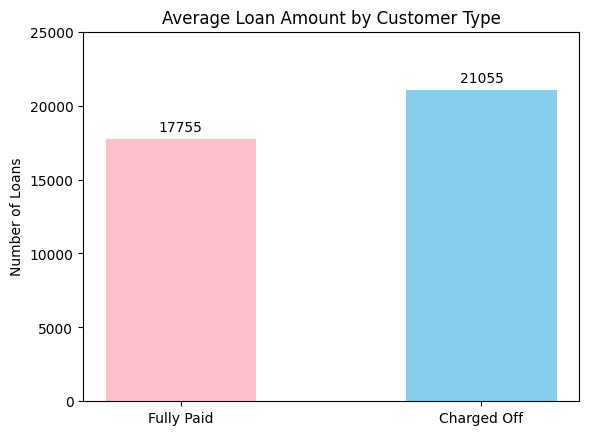

In [34]:
# 시각화
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)), # 정수 형태로 표시
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

fig, ax = plt.subplots()

bar_labels = ['Fully Paid', 'Charged Off']
bar_heights = [sum_fully_paid/len_fully_paid, sum_charged_off/len_charged_off]
bar_colors = ['pink', 'skyblue']

bar_container = ax.bar(bar_labels, bar_heights, color=bar_colors, width=0.5, label=bar_labels)
autolabel(bar_container)

ax.set_ylabel('Number of Loans')
ax.set_title('Average Loan Amount by Customer Type')
ax.set_ylim(0, 25000)

plt.show()

결과
* 체납 고객은 약 20%인데, 이 체납자들의 평균 거래 금액은 완납자들보다 많음. 이들의 체납이 지속된다면 우리에게는 큰 손실이 될테니 모델을 만들어서 체납/완납자를 구분할 필요가 있음